In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from sklearn import cluster

In [2]:
column_names = ("Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology","Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon","Hillshade_3pm","Horizontal_Distance_To_Fire_Points","Wilderness_Area_01","Wilderness_Area_02","Wilderness_Area_03","Wilderness_Area_04","Soil_Type_01","Soil_Type_02","Soil_Type_03","Soil_Type_04","Soil_Type_05","Soil_Type_06","Soil_Type_07","Soil_Type_08","Soil_Type_09","Soil_Type_10","Soil_Type_11","Soil_Type_12","Soil_Type_13","Soil_Type_14","Soil_Type_15","Soil_Type_16","Soil_Type_17","Soil_Type_18","Soil_Type_19","Soil_Type_20","Soil_Type_21","Soil_Type_22","Soil_Type_23","Soil_Type_24","Soil_Type_25","Soil_Type_26","Soil_Type_27","Soil_Type_28","Soil_Type_29","Soil_Type_30","Soil_Type_31","Soil_Type_32","Soil_Type_33","Soil_Type_34","Soil_Type_35","Soil_Type_36","Soil_Type_37","Soil_Type_38","Soil_Type_39","Soil_Type_40","Cover_Type"
)

In [3]:
soil = pd.read_table("covtype.data", sep=",", names=column_names)

In [4]:
# Copy first 50,000 rows into a new dataframe
soil2 = soil.copy(deep=True)
soil2.drop(soil2.index[50000:], inplace=True)
soil2.shape

(50000, 55)

In [5]:
soil2.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


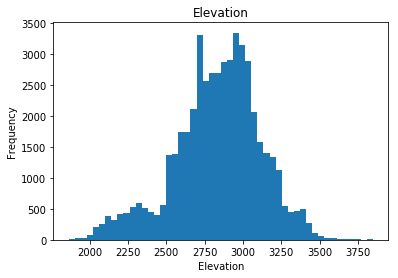

In [6]:
# Task 2
# Visualization for each column

soil2['Elevation'].plot(kind='hist', bins=50)
plt.title('Elevation')
plt.xlabel('Elevation')
axes = plt.gca()
#axes.set_xlim([0,100])
plt.show()

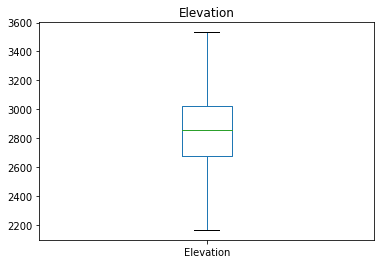

In [7]:
soil2.Elevation.plot(kind='box', showfliers=False)
plt.title('Elevation')
plt.show()

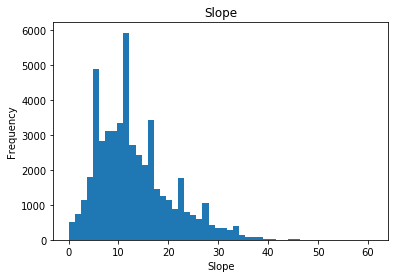

In [8]:
soil2['Slope'].plot(kind='hist', bins=50)
plt.title('Slope')
plt.xlabel('Slope')
axes = plt.gca()
#axes.set_xlim([0,100])
plt.show()

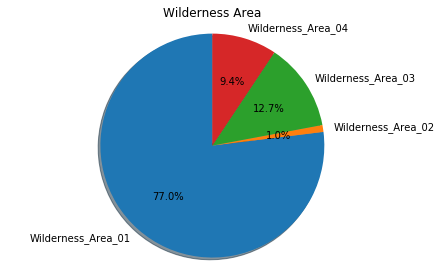

In [9]:
# Pie chart showing composition of wilderness area

columns = []
values = []

for pos in range(10,14):
    columns.append(soil2.columns[pos])
    values.append(soil2[soil2.columns[pos]].sum())
    
plt.pie(values, autopct='%1.1f%%',shadow=True, labels=columns, startangle=90)
plt.axis('equal')
plt.title('Wilderness Area')
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


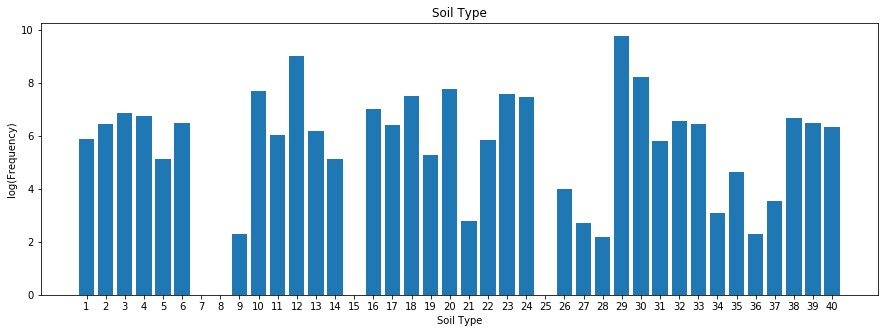

In [10]:
# Bar chart showing composition of soil type
# Had to plot y axis as log because one soil type made up most results

columns = []
values = []

i = 1 

for pos in range(14,54):
    columns.append(i)
    values.append(np.log(soil2[soil2.columns[pos]].sum()))
    i+=1
    
plt.bar(columns, values)
fig = plt.gcf()
fig.set_size_inches(15,5)
plt.title("Soil Type")
plt.xlabel('Soil Type')
plt.ylabel('log(Frequency)')
plt.xticks(columns)
plt.show()


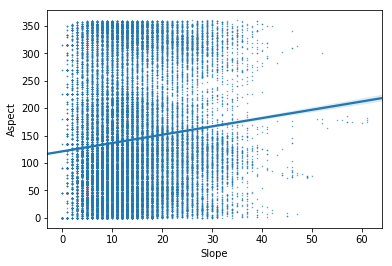

In [11]:
# Slope compared to Aspect (ratio of width to height of tree)
sns.regplot(x="Slope", y="Aspect", data=soil2, marker='o', scatter_kws={'s':0.2})

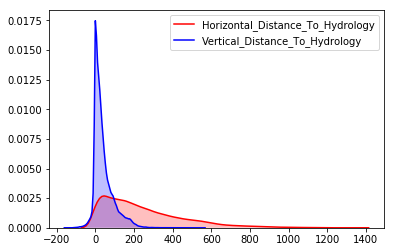

In [12]:
#Comparing distance of horizontal versus vertical distance to hydrology
#density plot

p1=sns.kdeplot(soil2['Horizontal_Distance_To_Hydrology'], shade=True, color="r")
p1=sns.kdeplot(soil2['Vertical_Distance_To_Hydrology'], shade=True, color="b")

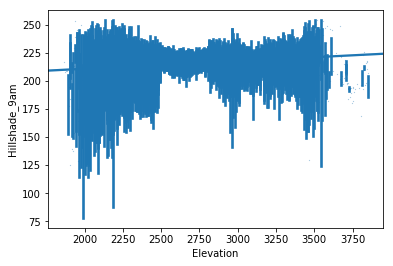

In [13]:
sns.regplot(x="Elevation", y="Hillshade_9am", data=soil2, x_estimator=np.mean, marker='o', scatter_kws={'s':0.02})